Exercise 4.9 (programming) Implement value iteration for the gambler’s problem and
solve it for ph = 0.25 and ph = 0.55. In programming, you may find it convenient to
introduce two dummy states corresponding to termination with capital of 0 and 100,
giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3.
Are your results stable as ✓ ! 0?

In [102]:
import random

states = [i for i in range(101)]
values = [random.random() for i in range(101)]
policy = [0 for i in range(101)]

values[100] = 1 # Winning state

gamma = 1
theta = 0.00001
ph = 0.4

def p(state, action, next_state):
    if state == 0:
        return 1 if next_state == 0 else 0
    elif state == 100:
        return 1 if next_state == 100 else 0
    else:
        if next_state == state + action:
            return ph
        elif next_state == state - action:
            return 1 - ph
        else:
            return 0

def get_reward(state):
    if state == 0:
        return 0
    elif state == 100:
        return 1
    else:
        return 0

while True:
    delta = 0
    for state in states:
        # Skip terminal states - they should not be updated
        if state == 0 or state == 100:
            continue
            
        v = values[state]

        # this is all one line in the book
        max_action = 0
        max_action_value = -float('inf')
        for action in range(1, min(state, 100 - state) + 1):
            action_value = 0
            # we dont need to loop over all states, since we know the next state is either state + action or state - action (so the rest will have a p of 0)
            action_value += p(state, action, state + action) * (get_reward(state + action) + gamma * values[state + action])
            action_value += p(state, action, state - action) * (get_reward(state - action) + gamma * values[state - action])
            if action_value > max_action_value:
                max_action_value = action_value
                max_action = action
        policy[state] = max_action
        values[state] = max_action_value
        
        delta = max(delta, abs(v - values[state]))

    if delta < theta:
        break

print("Value iteration converged!")

Value iteration converged!


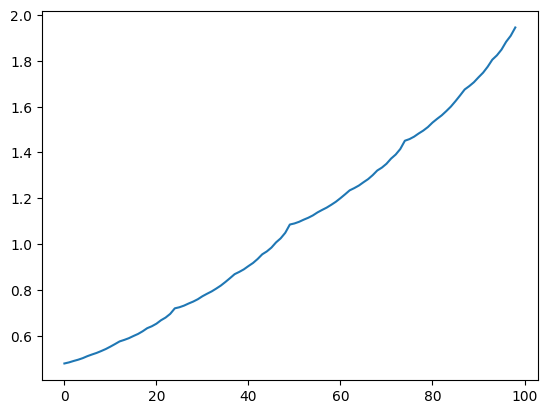

In [103]:
import matplotlib.pyplot as plt

# plot the values
plt.plot(values[1:100])
plt.show()

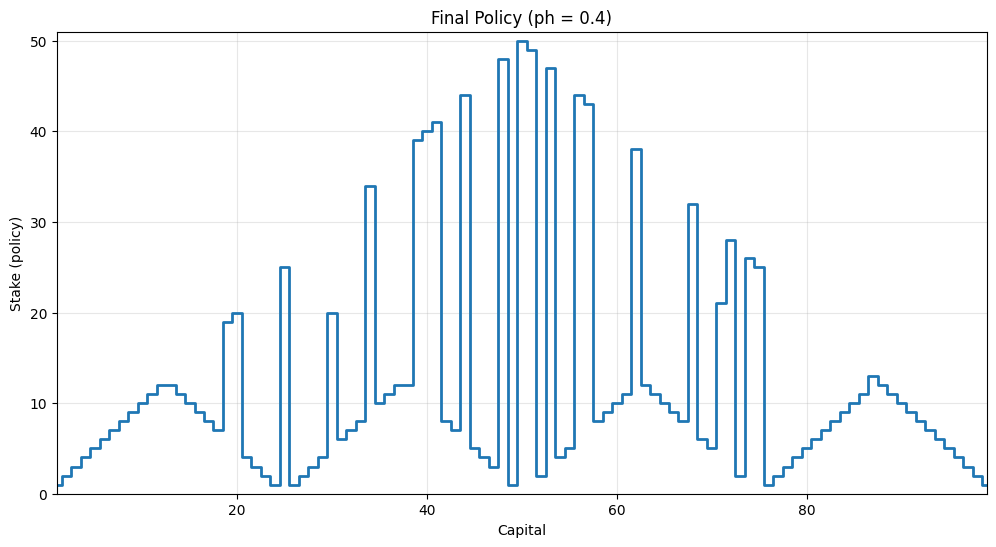

In [104]:
plt.figure(figsize=(12, 6))

states_to_plot = list(range(1, 100))
policy_to_plot = policy[1:100]

plt.step(states_to_plot, policy_to_plot, where='mid', linewidth=2)
plt.xlabel('Capital')
plt.ylabel('Stake (policy)')
plt.title(f'Final Policy (ph = {ph})')
plt.grid(True, alpha=0.3)
plt.xlim(1, 99)
plt.ylim(0, max(policy_to_plot) + 1)
plt.show()